In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/a-large-scale-fish-dataset/Segmentation_example_script.m
/kaggle/input/a-large-scale-fish-dataset/README.txt
/kaggle/input/a-large-scale-fish-dataset/license.txt
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00033.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00004.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00023.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00041.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00024.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00035.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00045.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00038.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00025.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/0000

In [2]:
import cv2
import matplotlib.pyplot as plt
import requests
from PIL import Image

processing some fishesss


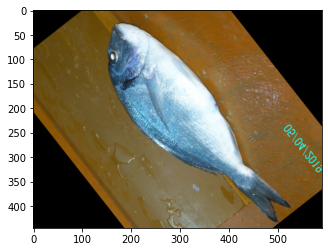

In [3]:
img=cv2.imread('/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Gilt-Head Bream/Gilt-Head Bream/00002.png')
plt.imshow(img)

In [4]:
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [5]:
img.shape

(445, 590, 3)

In [6]:
img.size

787650

grayscaling image

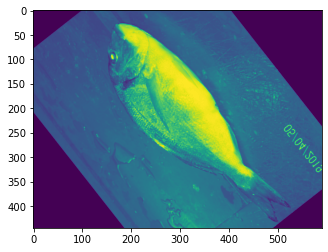

In [7]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img)

processing a collection of images

In [8]:
image_list=[]
folder_path='/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat'
# loop through all the files in the folder
for filename in os.listdir(folder_path):
    # construct the full file path
    file_path = os.path.join(folder_path, filename)
    # read the image using cv2.imread
    image = cv2.imread(file_path)
    if image is not None:
        # add the image to the list as a numpy array
        image_list.append(np.array(image))
image_array = np.stack(image_list, axis=0)

In [9]:
image_list[2]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

saving the images in an array

image_array

In [10]:
image_array.shape

(1000, 445, 590, 3)

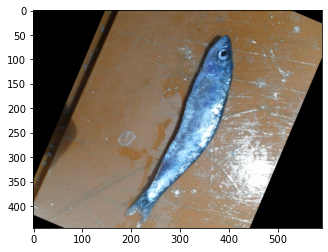

In [11]:
plt.imshow(image_array[15])

In [12]:
length=len(image_list)
grayimage_list=[]
for i, image in enumerate(image_list):
    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # replace the original image in the list with the grayscale image
    grayimage_list.append(gray)

plotting one image in the grayscale

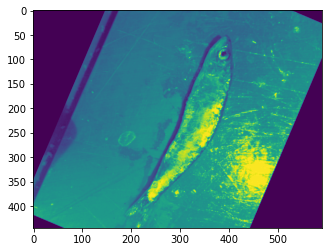

In [13]:
plt.imshow(grayimage_list[15])

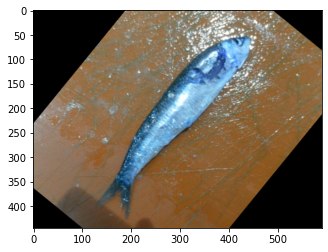

In [14]:
plt.imshow(image_list[4])

plotting multiple images

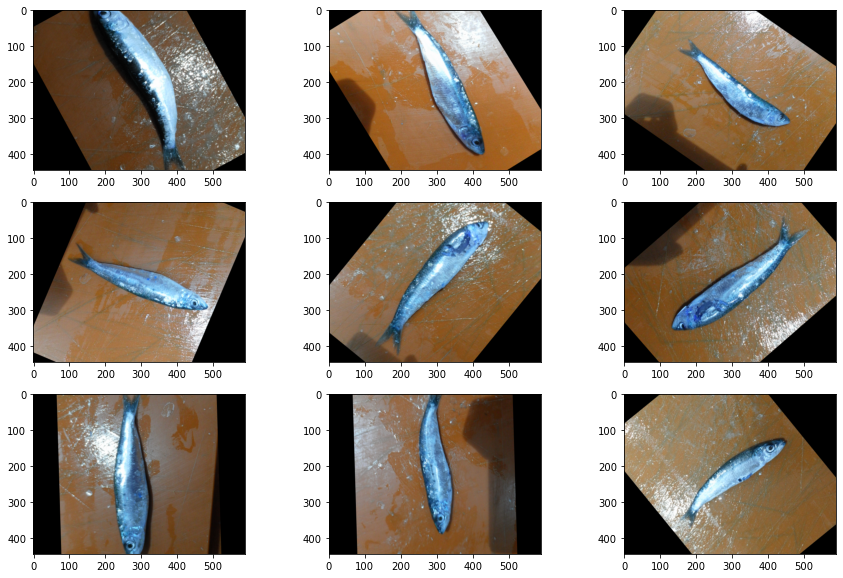

In [15]:
fig, axes = plt.subplots(3,3, figsize=(15,10))
axes = axes.ravel()#ravel changes the (2,2) array to a (4,) array to make it easier to iterate

# Plot each image in a separate subplot
for i, ax in enumerate(axes):
    ax.imshow(image_array[i])
plt.show()


viewing the grayscaled images 

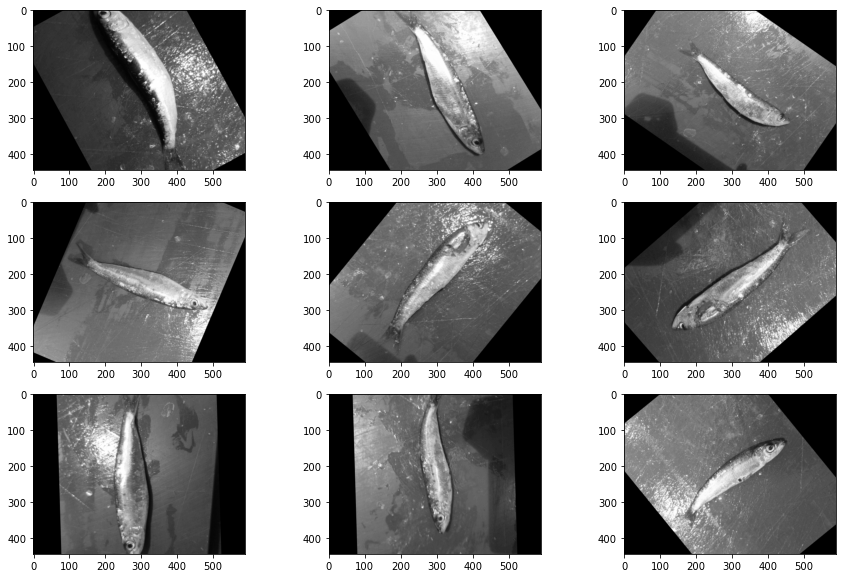

In [16]:
fig, axes = plt.subplots(3,3, figsize=(15,10))
axes = axes.ravel()#ravel changes the (2,2) array to a (4,) array to make it easier to iterate

# Plot each image in a separate subplot
for i, ax in enumerate(axes):
    ax.imshow(grayimage_list[i],cmap='gray')
plt.show()


splitting the rbg sections and storing them in 3 seperate lists

In [17]:
red=[]
blue=[]
green=[]
for img in image_array:
    b, g, r = cv2.split(img)
    red.append(r)
    green.append(g)
    blue.append(b)
red = np.stack(red, axis=0)
green= np.stack(green, axis=0)
blue= np.stack(blue, axis=0)


the 3 channels are now stored in 3 seperate arrays: red, blue and green

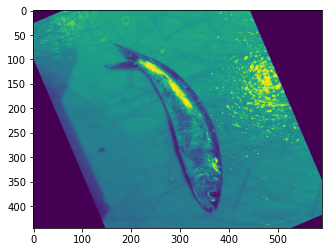

In [18]:
plt.imshow(blue[33])

In [19]:
image_array.shape

(1000, 445, 590, 3)

cropping the image thoroughout the entire list

In [20]:
crop=[]
for img in image_array:
    img_crop=img[0:300,100:400]
    crop.append(img_crop)
img_crop_array=np.stack(crop,axis=0)#stacking all the images from the list in an array

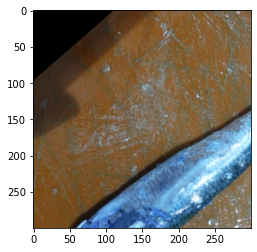

In [21]:
plt.imshow(img_crop_array[5])

Also, there is another way to show a particular color channel or mixture of color channels of the image. In the below code we are setting all the pixels for the blue channel to zero where ultimately our image will have only two channels red and blue which looks like below.

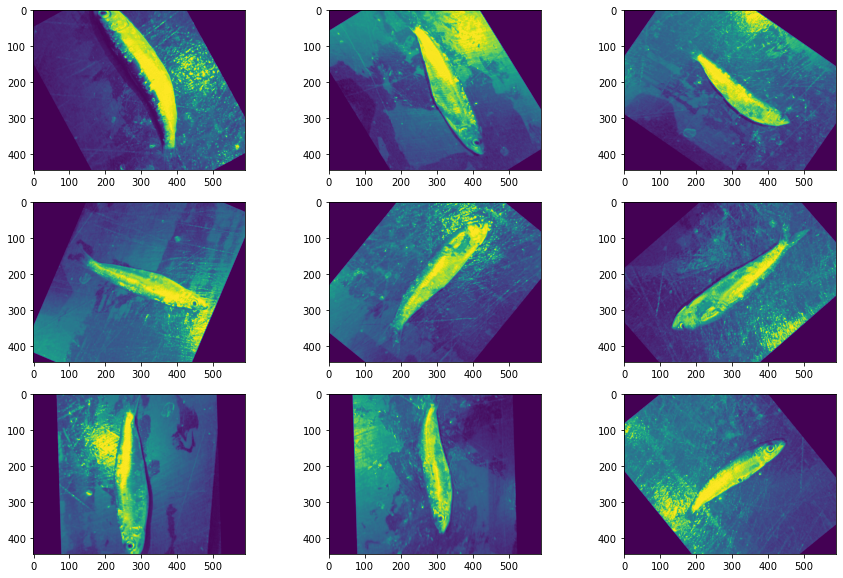

In [22]:
img1=image_array[:,:,:,2]
fig, axes = plt.subplots(3,3, figsize=(15,10))
axes = axes.ravel()#ravel changes the (2,2) array to a (4,) array to make it easier to iterate

# Plot each image in a separate subplot
for i, ax in enumerate(axes):
    ax.imshow(img1[i])
plt.show()

rotating all images in the array/list

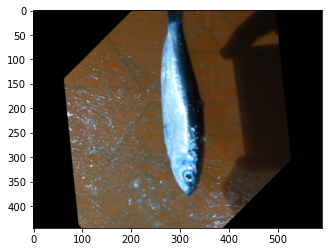

In [23]:
rot_image=[]
height, width = image_array[0].shape[:2]
center = (width/2, height/2)
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=45, scale=1)
for img in image_array:
    rotated_image = cv2.warpAffine(src=img, M=rotate_matrix, dsize=(width, height))
    rot_image.append(rotated_image)
plt.imshow(rot_image[77])

Now next is image translation, where will push the image diagonally down.

([], [])

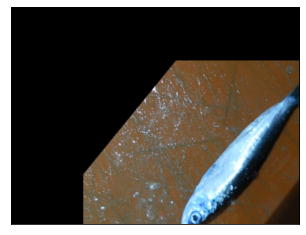

In [24]:
tx, ty = width / 4, height / 4
tra_image=[]
translation_matrix = np.array([
    [1, 0, tx],
    [0, 1, ty]
], dtype=np.float32)
for img in image_array:
   translated_image = cv2.warpAffine(src=img, M=translation_matrix, dsize=(width, height))
   tra_image.append(translated_image)
plt.imshow(tra_image[77])
plt.xticks([])
plt.yticks([])

using the canny algorithm to detect edges

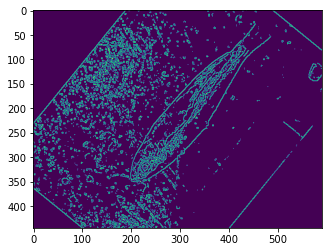

In [25]:
canny_image=[]
for img in image_array:
    edges = cv2.Canny(img,100,100,True)
    canny_image.append(edges)
canny_image=np.stack(canny_image,axis=0)
plt.imshow(canny_image[77])

Sobel detection



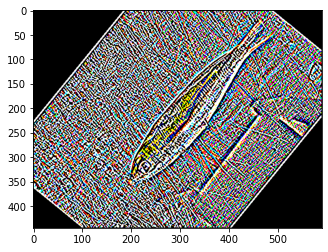

In [26]:
sobel_image=[]
for img in image_array:
   sobel_edge = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
   sobel_image.append(sobel_edge)
plt.imshow(sobel_image[77])
# Display Sobel Edge Detection Images


**Contour Detection**

In this part of the implementation, we will learn to detect the contour in a given image. We need to first convert the image into a binary image then a suitable contour detection algorithm is applied to it.

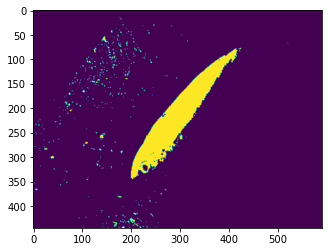

In [27]:
cont_image=[]
for img in image_array:
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)
    cont_image.append(thresh)
cont_image=np.stack(cont_image,axis=0)
plt.imshow(cont_image[77])

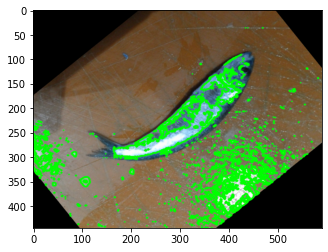

In [28]:
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
cv2.drawContours(image=img, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

# See the results
plt.imshow(img)